In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight
import Base: ==, +, *, -, <, >, copy, Random, hash

In [5]:
n = 40
i = 15

15

In [6]:
p = SimulationMDP(n);

	Simulation no.: 15


Interact.Options{:SelectionSlider,Any}(5: "input-2" = 3 Any , "j", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

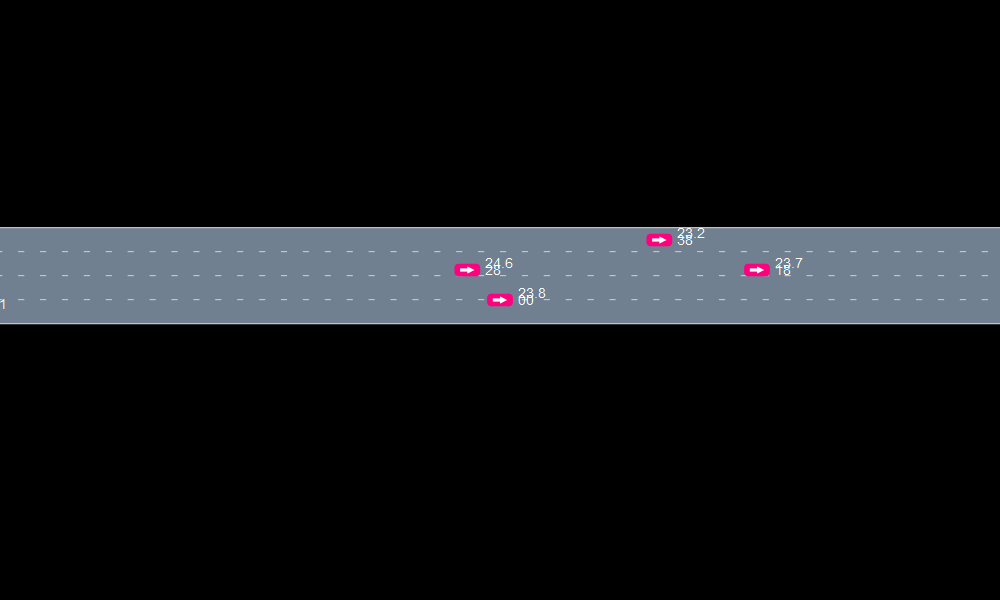

In [7]:
policyFileName = "../scratch/SingleAgentGrid/SingleAgentGridPolicy.jld"
hf1 = HierarchicalFramework1(p, policyFileName)
println("\tSimulation no.: $i")
rng = MersenneTwister(i*29+1)
hp1 = HierarchicalPolicy1(hf1,rng)
hr = HistoryRecorder(max_steps = 150, rng = rng)
hist = simulate(hr, p, hp1)
@manipulate for j in 1:n_steps(hist)+1
    (p,state_hist(hist)[j],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

Interact.Options{:SelectionSlider,Any}(5: "input-2" = 5 Any , "i", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(7, "7"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

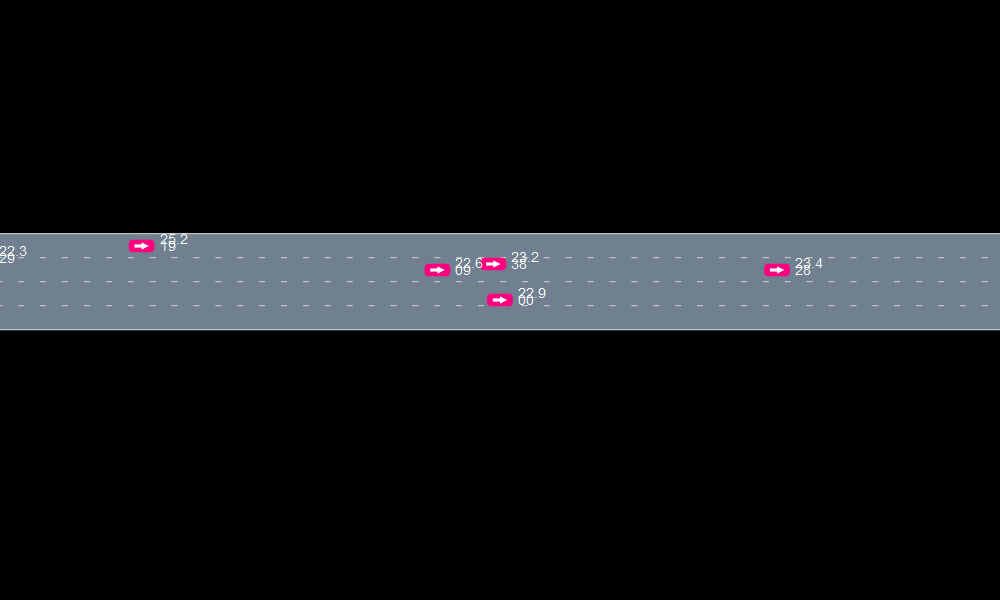

In [5]:
rng = MersenneTwister(i*29+1)
policy1 = subintentional_simulation_policy(p, rng)
hr1 = HistoryRecorder(max_steps = 150, rng = rng)
hist1 = simulate(hr1, p, policy1)
@manipulate for i in 1:n_steps(hist1)+1
    (p,state_hist(hist1)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

In [8]:
supertype(POMDPs.Solver)

Any